# Exercice 1. (Expérience de Galton)
<span style="color:red"> Afin d'éviter toute remarque inutile sur le respect PEP8 je précise à mon aimable correcteur que chaque cellule a fait l'objet de la correction automatique PEP8 via le plugin notebook. MERCI :)


## 1) Récupérer les données du fichier


In [2]:
###
# Import librairy
###

%matplotlib inline
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines  # get function source code
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys
import scipy
import sklearn.preprocessing
from sklearn import preprocessing

In [19]:
# Paramètres
filename = "Galton"
df = pd.read_csv(filename + '.txt', sep='\t')

# Convertir en cm et arrondir
df[['Father', 'Mother', 'Height']] *= 2.54
df = df.round({'Father': 0, 'Mother': 0, 'Height': 0})

# Affichage Test
print(df.head(3))


df3 = df["Gender"].str.upper()
print(df3.head(3))
# Affichage Test

df3[df3==df3] = 1

print(df3.head(3))

print(df.head(3))

  Family  Father  Mother Gender  Height  Kids
0      1   199.0   170.0      M   186.0     4
1      1   199.0   170.0      F   176.0     4
2      1   199.0   170.0      F   175.0     4
0    M
1    F
2    F
Name: Gender, dtype: object
0    1
1    1
2    1
Name: Gender, dtype: object
  Family  Father  Mother Gender  Height  Kids
0      1   199.0   170.0      M   186.0     4
1      1   199.0   170.0      F   176.0     4
2      1   199.0   170.0      F   175.0     4


## 2) Identifier les données manquantes 

In [29]:
# Test sur les dimension avec et sans drop
print("Y a t-il des données manquantes ?",
      df.shape[0] != df.dropna(how='any').shape[0])
print("Il y %s données dans cette base" % df.shape[0])

Y a t-il des données manquantes ? False
Il y 898 données dans cette base


### 3) Afficher sur un même graphe un estimateur de la densité de la population des pères en bleu, et de celles des mères en orange

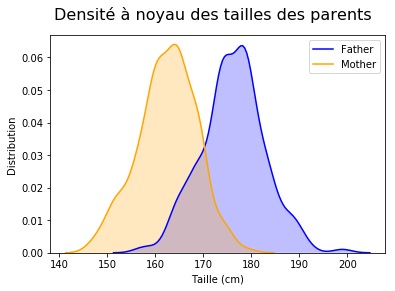

In [30]:
# On évite que les parents de famille nombreuse comptent plusieurs fois en faisant un groupeBY + mean ou max ou min etc
df_groupe = df.groupby('Family').mean()

# Légendes
fig, ax = plt.subplots()
ax.set_xlabel("Taille (cm)")
ax.set_ylabel("Distribution")

# Représentation à Noyau
fig = sns.kdeplot(df_groupe['Father'], shade=True, color="blue")
fig = sns.kdeplot(df_groupe['Mother'], shade=True, color="orange")
fig.figure.suptitle("Densité à noyau des tailles des parents", fontsize=16)

plt.show()

## 4) Afficher la taille du père en fonction de la taille de la mère pour les n observations figurant dans les données. 


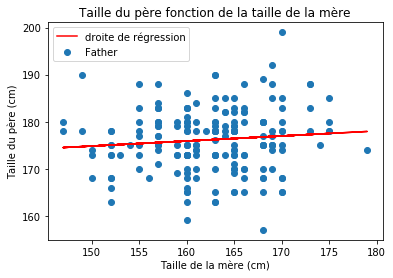

In [31]:
# Modèle de régression linéaire
lr_F_from_M = linear_model.LinearRegression(fit_intercept=True)
lr_F_from_M.fit(df_groupe['Mother'].values.reshape(-1, 1),
                df_groupe['Father'].values.reshape(-1, 1))

# Légendes
fig, ax = plt.subplots()
ax.set_xlabel("Taille de la mère (cm)")
ax.set_ylabel("Taille du père (cm)")
plt.title("Taille du père fonction de la taille de la mère")

# Représentation
fig = plt.scatter(df_groupe['Mother'], df_groupe['Father'])
plt.plot(df_groupe['Mother'], lr_F_from_M.predict(
    df_groupe['Mother'].values.reshape(-1, 1)), color="red", label="droite de régression")


plt.legend()
plt.show()

## 5) Afficher un histogramme du nombre d'enfants par famille.

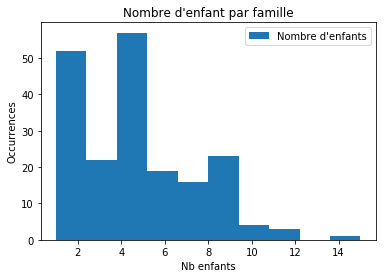

In [32]:
# Légende
fig, ax = plt.subplots()
ax.set_xlabel("Nb enfants")
ax.set_ylabel("Occurrences")
plt.title("Nombre d'enfant par famille")

# Représentation
plt.hist(df_groupe['Kids'], label="Nombre d'enfants")

plt.legend()
plt.show()

## 6) Créer une colonne supplémentaire appelée 'MidParents' qui contient la taille du parent moyen, et valant ('Father'+ 1.08 * 'Mother')/2.


In [33]:
# Création de la colonne supplémentaire
df['MidParents'] = (df['Father'] + 1.08 * df['Mother']) / 2
df = df.round({'MidParents': 0})

# Affichae Test
print(df.head(3))

  Family  Father  Mother Gender  Height  Kids  MidParents
0      1   199.0   170.0      M   186.0     4       191.0
1      1   199.0   170.0      F   176.0     4       191.0
2      1   199.0   170.0      F   175.0     4       191.0


## 7) Estimer θ0, θ1, par θ^0, θ^1 en utilisant la fonction LinearRegression de sklearn

In [34]:
# Modèle de régression
lr_height_from_MDI = linear_model.LinearRegression(fit_intercept=True)
lr_height_from_MDI.fit(df['MidParents'].values.reshape(-1, 1),
                       df['Height'].values.reshape(-1, 1))

# Moyenne empirique
x_mean = df['MidParents'].mean()
y_mean = df['Height'].mean()

# Teta 0 et Teta1
teta_1 = ((df['MidParents'] - x_mean) * (df['Height'] - y_mean)).sum()
teta_1 /= ((df['MidParents'] - x_mean) * (df['MidParents'] - x_mean)).sum()

teta_0 = y_mean - teta_1 * x_mean

# Verification numériques :
print("La valeur Téta 1 du modèle est elle égale à la valeur calculée numériquement :",
      np.isclose(lr_height_from_MDI.coef_, teta_1)[0][0])
print("La valeur Téta 0 du modèle est elle égale à la valeur calculée numériquement :", np.isclose(
    lr_height_from_MDI.intercept_, teta_0)[0])

La valeur Téta 1 du modèle est elle égale à la valeur calculée numériquement : True
La valeur Téta 0 du modèle est elle égale à la valeur calculée numériquement : True


## 8) Calculer et visualiser les valeurs préditessur le même graphique
On affichera de couleurs différentes les données correspondant aux garçons et celles correspondant aux filles

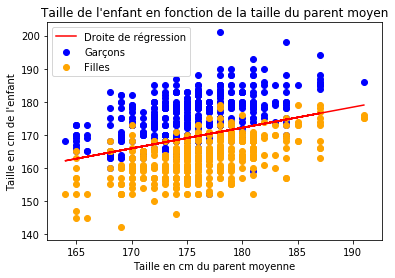

In [35]:
# Légende
fig, ax = plt.subplots()
ax.set_xlabel("Taille en cm du parent moyenne")
ax.set_ylabel("Taille en cm de l'enfant")
plt.title("Taille de l'enfant en fonction de la taille du parent moyen")


# Représentation
plt.scatter(df[df['Gender'] == 'M']['MidParents'],
            df[df['Gender'] == 'M']['Height'], color='blue', label="Garçons")
plt.scatter(df[df['Gender'] == 'F']['MidParents'],
            df[df['Gender'] == 'F']['Height'], color='orange', label="Filles")
# Prédictions
plt.plot(df['MidParents'], lr_height_from_MDI.predict(
    df['MidParents'].values.reshape(-1, 1)), color="red", label="Droite de régression")


plt.legend()
plt.show()

## 9) Visualiser un estimateur de la densité des résidus ri.
L'hypothèse de normalité est-elle crédible selon vous ? 

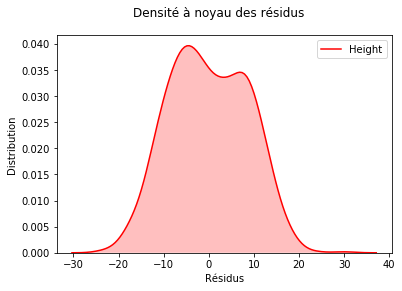

In [36]:
# Calcul des résidus
residus = df['Height'] - lr_height_from_MDI.predict(df['MidParents'].values.reshape(-1, 1)).flatten()

# Représentation
fig = sns.kdeplot(residus, shade=True, color="red")
fig.figure.suptitle("Densité à noyau des résidus")
plt.xlabel('Résidus')
plt.ylabel('Distribution')

plt.show()

L'hypothèse de la normalité n'est pas crédible en l'état tous sexes confondus. En effet, la densité des résidus n'approche pas une gaussienne.

### Calculer ensuite αg (resp. αf ) les proportions de garçons (resp.de filles) dans la population. 

Vérification Pop Homme + Prop Femme = 1 : True


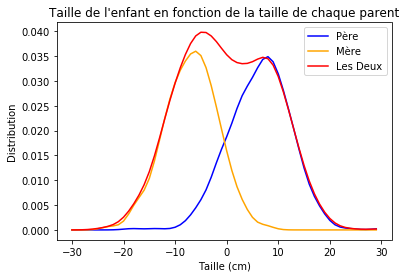

In [37]:
# Split des dataframes par Hommes et Femmes
df_g = df[df['Gender'] == 'M']
df_f = df[df['Gender'] == 'F']

# Calcul des proportions
alpha_g = df_g.shape[0] / df.shape[0]
alpha_f = df_f.shape[0] / df.shape[0]

print("Vérification Pop Homme + Prop Femme = 1 :",
      np.isclose(1, (alpha_g + alpha_f)))

# Calcul des résidus par sexe
residu_g = (df_g['Height'] - lr_height_from_MDI.predict(
    df_g['MidParents'].values.reshape(-1, 1)).flatten())

residu_f = (df_f['Height'] - lr_height_from_MDI.predict(
    df_f['MidParents'].values.reshape(-1, 1)).flatten())

# Calcul des densités de probabilités par sexe
kde_g = scipy.stats.gaussian_kde(residu_g)
kde_f = scipy.stats.gaussian_kde(residu_f)
kde_global = scipy.stats.gaussian_kde(residus)


# Légendes
fig, ax = plt.subplots()
ax.set_xlabel("Taille (cm)")
ax.set_ylabel("Distribution")
plt.title("Taille de l'enfant en fonction de la taille de chaque parent")

# Représentation
x = range(-30, 30, 1)
plt.plot(x, kde_g(x) * alpha_g, color="blue", label="Père")
plt.plot(x, kde_f(x) * alpha_f, color="orange", label="Mère")
plt.plot(x, kde_global(x), color="red", label="Les Deux")

plt.legend()
plt.show()

En revanche en séparant les résidus par sexe on remarque que ces derniers suivent bien chacun des densités gaussiennes. L'hypothèse de la normalité par sexe semble crédible.

## 10) Régresser cette fois les xi sur les yi (et non plus les yi sur les xi). 

In [38]:
# Régression linéaire des tailles des parents moyen depuis la taille des enfants
lr_MDI_from_Height = linear_model.LinearRegression()
lr_MDI_from_Height.fit(df['Height'].values.reshape(-1, 1),
                       df['MidParents'].values.reshape(-1, 1))

print("Le coefficient alphaO depuis le modèle vaut :",
      lr_MDI_from_Height.intercept_[0])
print("Le coefficient alpha1 depuis le modèle vaut :",
      lr_MDI_from_Height.coef_[0][0])

Le coefficient alphaO depuis le modèle vaut : 149.054766045
Le coefficient alpha1 depuis le modèle vaut : 0.158098522317


In [39]:
# Par la méthode numérique
X = df['MidParents']
Y = df['Height']

var_x = X.var()
var_y = Y.var()

var_x2 = ((X - X.mean()) * (X - X.mean())).sum()
var_y2 = ((Y - Y.mean()) * (Y - Y.mean())).sum()

var_x = var_x2
var_y = var_y2

var_xy = var_x / var_y

alpha_O = X.mean() + (Y.mean() * var_x * (teta_0 - Y.mean())) / (X.mean() * var_y)
alpha_1 = teta_1 * var_x / var_y

print("Le coefficient alphaO depuis le calcul numérique vaut :", alpha_O)
print("Le coefficient alpha1 depuis le calcul numérique vaut :", alpha_1)

print("\nLe coef. alpha0 du modèle est il égal à celui du calcul numérique :",
      np.isclose(alpha_O, lr_MDI_from_Height.intercept_[0]))
print("Le coef. alpha0 du modèle est il égal à celui du calcul numérique :",
      np.isclose(alpha_1, lr_MDI_from_Height.coef_[0][0]))

Le coefficient alphaO depuis le calcul numérique vaut : 149.05476604477343
Le coefficient alpha1 depuis le calcul numérique vaut : 0.15809852231740423

Le coef. alpha0 du modèle est il égal à celui du calcul numérique : True
Le coef. alpha0 du modèle est il égal à celui du calcul numérique : True


On retrouve bien les mêmes valeurs

# Exercice 2. (Analyse du jeu de données auto-mpg)

## 11) Importer les données

In [40]:
# Paramètres
filename = "auto-mpg.data-original"
columns = ["mpg", "cylinders", "displacement", "horsepower",
           "weight", "acceleration", "model_year", "origin", "car_name"]

# Création du dataframe
df_car = pd.read_csv(filename + '.txt', sep=r"\s+", names=columns)

Y a-t-il un marqueur utilisé p our  les données manquantes dans le fichier utilisé    ? Oui des valeurs de type 'NA'

In [41]:
# Drop des valeurs manquantes
nb_ligne_origine = df_car.shape[0]
df_car.dropna(how='any', inplace=True)

print('Nombre de valeurs manquantes : ', nb_ligne_origine - df_car.shape[0])
print('Nombre de valeurs du jeu de données : ', df_car.shape[0])

# Vecteur des observations Yi
mpg = df_car["mpg"]

# Centrage réduction des Yi et réassignement du dataframe normalisé dans mpg
scaler_mpg = preprocessing.StandardScaler().fit(mpg.values.reshape(-1, 1))
mpg = pd.DataFrame(data=scaler_mpg.transform(mpg.values.reshape(1, -1)))

Nombre de valeurs manquantes :  14
Nombre de valeurs du jeu de données :  392


## 12) Calculer l'estimateur des moindres carrés θ̂ sur les 9 premières lignes

In [42]:
# Slicings
df_car_12 = df_car.iloc[0:9, 1::]
df_car_12.drop(["car_name", "origin"], axis=1, inplace=True)
mpg_12 = df_car["mpg"][0:9]

# Modèle de Régression
lr_car_12 = linear_model.LinearRegression(fit_intercept=True)
lr_car_12.fit(df_car_12, mpg_12.values.reshape(-1, 1))

# On classe les couples coefficients features par ordre croissant
list_features = zip(abs(lr_car_12.coef_[0]), df_car_12.columns)

# Affichage
sort_list_features = (sorted(list(list_features), reverse=True))
print("\n".join([str(x) for x in sort_list_features]))

(0.19936701268572882, 'acceleration')
(0.094530596162000061, 'horsepower')
(0.054088475668277514, 'displacement')
(0.0042407367063116569, 'weight')
(0.0, 'model_year')
(0.0, 'cylinders')


### Que constatez-vous pour les variables cylinders model year ?


Les variables "cylinders" et "model_year" n'ont pas d'influence sur le modèle (coefficents nuls), ce qui est normal vu qu'elles sont identiques pour toutes les observations elles n'apportent donc aucune information 

## 13 ) Cette fois sur l'intégralité des données, après les avoir centrées et réduites.
Quelles sont les deux variables qui expliquent le plus la consommation d'un véhicule ?

In [43]:
# Création du dataframe
df_car_13 = df_car.copy()
df_car_13.drop(["origin", "mpg", "car_name"], axis=1, inplace=True)

# Centrage et réduction du jeu de données
scaler_13 = preprocessing.StandardScaler().fit(df_car_13)
car_13 = scaler_13.transform(df_car_13)

# On réassigne les valeurs centrées réduites au dataframe d'origine
df_car_13 = pd.DataFrame(data=scaler_13.transform(
    df_car_13), columns=df_car_13.columns)

# Modèle de Régression
lr_car_13 = linear_model.LinearRegression(fit_intercept=False)
lr_car_13.fit(df_car_13, mpg.values.reshape(-1, 1))


# Trie et Affichage des coéfficients de régression
features = zip(map(abs, lr_car_13.coef_[0]), df_car_13.columns)

sorted_coef = sorted(features, reverse=True)
print(sorted_coef)
print("\nLes deux variables explicatives les plus significatives des consommations sont : \n*%s  \n*%s" %
      (sorted_coef[0], sorted_coef[1]))

[(0.73944398644893838, 'weight'), (0.35556739894897599, 'model_year'), (0.10294694602680549, 'displacement'), (0.072090655791223854, 'cylinders'), (0.030141841853979778, 'acceleration'), (0.0019300083960402531, 'horsepower')]

Les deux variables explicatives les plus significatives des consommations sont : 
*(0.73944398644893838, 'weight')  
*(0.35556739894897599, 'model_year')


## 14) Calculer la norme des résidus r2, puis vérifier numériquement que les résidus sont orthogonaux aux observations et que les prédictions  y^ sont les projections des observations dans l'espace des variables explicatives

In [44]:
# Calcul des résidus r2 et de leur norme au carré
vect_residus = mpg.values.reshape(-1, 1) - lr_car_13.predict(df_car_13)
carre_norm_residu = np.linalg.norm(vect_residus)**2

# Affichage
print("Le carré de la norme des résidus vaut :", carre_norm_residu)

n, p = df_car_13.shape
carre_norm_residu_normalisé = carre_norm_residu / (n - p)
print("La normalisation par (n-p) du carré de la norme des résidus vaut : ",
      carre_norm_residu_normalisé)

# Vérification numérique
y = mpg.values
y_chapeau = lr_car_13.predict(df_car_13)
y_mean = mpg.values.mean()
vect_y_mean = np.full(y.shape[0], fill_value=y_mean, dtype=np.dtype(float))

# Norme carré des observations recentrées
membre1 = np.linalg.norm(y - y_mean)**2
# Normes carré des prédictions recentrées et des résidus carré
membre2 = np.linalg.norm(y_chapeau - y_mean)**2 + carre_norm_residu

# Affichage et conclusion
print("\nVérification numérique : ")
print(np.linalg.norm(y - y_mean)**2)
print(np.linalg.norm(y_chapeau - y_mean)**2 + carre_norm_residu)
print(" -> Les valeurs sont-elles identiques : ", np.isclose(membre1, membre2))

Le carré de la norme des résidus vaut : 74.7719266969
La normalisation par (n-p) du carré de la norme des résidus vaut :  0.193709654655

Vérification numérique : 
392.0
392.0
 -> Les valeurs sont-elles identiques :  True


## 15) Supposons que l'on vous fournisse les caractéristiques ci-après d'un nouveau véhicule


In [45]:
# Prédiction des consommations pour X =[6,225,100,3233,15.4,76]
X = np.asarray([[6, 225, 100, 3233, 15.4, 76], ])
estim_conso = lr_car_13.predict(scaler_13.transform(X))[0]

# Calcul inverse du centrage et de la réduction pour la prédiction
estim_conso = scaler_mpg.inverse_transform(estim_conso)

print("L'éstimation de la consommation vaut :", estim_conso[0], 'pour 22 ')

L'éstimation de la consommation vaut : 21.7762201826 pour 22 


## 16) Utiliser la transformation PolynomialFeatures de sklearn sur les données brutes
On normalisera et recentrera après avoir crée les nouvelles valeurs.
Quelle est la variable la plus explicative de la consommation ?

In [46]:
# Création du Dataframe à partir du dataframe d'origine
df_car_16 = df_car.copy()
df_car_16.drop(["origin", "car_name", "mpg"], axis=1, inplace=True)

# Création du polynome d'ordre 2 des features
poly = sklearn.preprocessing.PolynomialFeatures(
    2, interaction_only=False, include_bias=False)
poly.fit_transform(df_car_16)

# Données du polynome
car_16 = poly.transform(df_car_16)

# Centrage et réduction du jeu de donnée
scaler_16 = preprocessing.StandardScaler().fit(car_16)
df_car_16 = pd.DataFrame(data=scaler_16.transform(
    car_16), columns=poly.get_feature_names(df_car_16.columns))

# Modèle de régression
lr_car_16 = linear_model.LinearRegression(fit_intercept=False)
lr_car_16.fit(df_car_16, mpg.values.reshape(-1, 1))

# Classement des coefficients
list_features = zip(map(abs, lr_car_16.coef_[0]), df_car_16.columns)

sorted_coef = sorted(list_features, reverse=True)
print("La variable la plus explicative est celle dont la valeur absolue du coefficient est la plus grande soit : \n la variable \"%s\" avec un coefficient de : %s" %
      (sorted_coef[0][1], sorted_coef[0][0]))

La variable la plus explicative est celle dont la valeur absolue du coefficient est la plus grande soit : 
 la variable "displacement" avec un coefficient de : 6.21342258773


## 17 ) Modèle sans interactions avec l'origine des voitures. Proposez une manière de gérer la variable origin.
Déterminez laquelle des trois origines est la plus efficace en terme de consommation.

In [47]:
# Génère les dummies
df_car_17 = pd.get_dummies(df_car, columns=["origin"], drop_first=True)
df_car_17.drop(["car_name", "mpg"], axis=1, inplace=True)

# Centrage et réduction des données et réassignement au dataframe
scaler_17 = preprocessing.StandardScaler().fit(df_car_17)
df_car_17.replace(scaler_17.transform(df_car_17), 0)

# Modèle de régression sans constante
lr_car_17 = linear_model.LinearRegression(fit_intercept=False)
lr_car_17.fit(df_car_17, mpg.values.reshape(-1, 1))

# Coefficients de régression
coeff = lr_car_17.coef_[0]

print(
    "Coefficient de comparaison des voitures Japonnais par rapport  aux Américaines :", coeff[-1])
print(
    "Coefficient de comparaison des voitures Européennes par rapport aux Américaines :", coeff[-2])
print("Conclusion :\nLes Américaines consomment plus que les Japonaises et les Japonaises consomment plusque les Européennes \n -> Les Européennees sont les plus efficaces !")

Coefficient de comparaison des voitures Japonnais par rapport  aux Américaines : 0.333253817645
Coefficient de comparaison des voitures Européennes par rapport aux Américaines : 0.2144396603
Conclusion :
Les Américaines consomment plus que les Japonaises et les Japonaises consomment plusque les Européennes 
 -> Les Européennees sont les plus efficaces !


## 18) Procéder comme pour la question précédente mais cette fois -ci pour mesurer l'influence de la marque de la voiture

In [48]:
###
# \xa0Nettoyage et assignation des données sur les Marques de voitures
###

# Fonction pour nettoyer les données de la marque des voitures
def replace_df(df, column_name, list_tuple):
    for t in list_tuple:
        df[column_name] = df[column_name].str.replace(t[0], t[1])
    return df


# Liste des erreurs liées aux marques de voitures
list_modifications = [("vokswagen", "volkswagen"), ("vw", "volkswagen"), ("mercedes-benz", "mercedes"),
                      ("toyouta", "toyota"), ("maxda", "mazda"), ("chevroelt", "chevrolet"), ("chevy", "chevrolet")]

# Copy du dataset d'origine
df_car_18 = df_car.copy()
df_car_18.drop(["origin", "mpg"], axis=1, inplace=True)

# Nettoyage des données sur les marques et split pour ne récupérer que le nom des marques
df_car_18 = replace_df(df_car_18, "car_name", list_modifications)
df_car_18["car_name"] = df_car_18["car_name"].str.strip().str.split(' ').str[0]

# Transformation de la colonne en dummies
df_car_18 = pd.get_dummies(df_car_18, columns=["car_name"], drop_first=False)

# Drop d'une marque au hasard
df_car_18.drop("car_name_ford", axis=1, inplace=True)

In [49]:
###
# Modèle de régression
###

# On recentre et réduit les donnés
scaler_18 = preprocessing.StandardScaler().fit(df_car_18)
car_18 = scaler_18.transform(df_car_18)

# On réassigne les valeurs centré réduite au dataframe d'origine
df_car_18N = pd.DataFrame(data=car_18, columns=df_car_18.columns)

# Modèle de Régression
lr_car_18 = linear_model.LinearRegression(fit_intercept=False)
lr_car_18.fit(df_car_18N, mpg.values.reshape(-1, 1))


# Création des tuples (coefficient de regression, marques)
list_features = zip(lr_car_18.coef_[0], df_car_18.columns)

sort_list_features = (sorted(list(list_features)[6:], reverse=True))
print("\n".join([str(x) for x in sort_list_features]))

print("\n\nLa marque de voiture ayant l'influence la plus délétère sur les consommations est la marque :",
      sort_list_features[-1][1].replace("car_name_", "").upper(), "\ncar son coefficient est celui qui diminue le plus la variable d'observation : MilesPerGallon")

(0.15406085942040837, 'car_name_datsun')
(0.12421379820113967, 'car_name_volkswagen')
(0.10200364693597321, 'car_name_honda')
(0.088383131838974505, 'car_name_toyota')
(0.074970443659187119, 'car_name_fiat')
(0.071378418588143769, 'car_name_plymouth')
(0.058920146150534779, 'car_name_audi')
(0.054986065247241797, 'car_name_mazda')
(0.054677782769656638, 'car_name_pontiac')
(0.054073002326959468, 'car_name_peugeot')
(0.050623082829963605, 'car_name_triumph')
(0.046625338538759172, 'car_name_dodge')
(0.044130862765769531, 'car_name_mercedes')
(0.041573952678537633, 'car_name_renault')
(0.035450523187783051, 'car_name_oldsmobile')
(0.03499233568825863, 'car_name_subaru')
(0.034206386115645956, 'car_name_saab')
(0.033873547135159728, 'car_name_nissan')
(0.029458622114214413, 'car_name_cadillac')
(0.025728838279175766, 'car_name_chevrolet')
(0.024984179594879346, 'car_name_hi')
(0.020863992219602563, 'car_name_opel')
(0.01508020487782305, 'car_name_volvo')
(0.014817715487263102, 'car_name_b

## 19) Reprendre la matrice  X obtenue (sans variables catégorielles) de la question 13, obtenir numériquement la SVD.
Vérifiez numériquement que H =UUt est un projecteur orthogonale

In [50]:
# Copy de la dataframe 13 Centré Et Réduit sans variables catégorielles
df_car_19 = df_car_13.copy()

# Calcul des la décomposition en SVD de la matrice X de la question 13
U, s, V = np.linalg.svd(df_car_19, full_matrices=False)
print(U.shape, V.shape, s.shape)

# Assignation des variables
H = U.dot(U.transpose())
H2 = H.dot(H)

# Calcul des tests de projection
test1 = np.allclose(H, H2)
test2 = np.allclose(H, H.transpose())

# Conclusion
print("Vérification H2 = H :", test1)
print("Vérification H = H.transpose :", test2)
print("-> H est un projecteur orthogonal " if test1 &
      test2 else "-> H n'est pas un projecteur orthogonal ")

(392, 6) (6, 6) (6,)
Vérification H2 = H : True
Vérification H = H.transpose : True
-> H est un projecteur orthogonal 


## 20) Ajoutez la diagonale de la matrice H à la base de donnée puis triez celle-ci en fonction de cette variable.
Expliquer en quoi les voitures ayant les trois valeurs de "leviers" maximales semblent atypiques.

In [51]:
# Copy du dataframe de départ puis ajout de la nouvelle colonne explicatives
df_car_20 = df_car.copy()

# Rapelle des caratéristiques de l'échantillon
print(df_car_20.describe())

# Ajout de la colonne "Levier"
df_car_20["leviers"] = H.diagonal()

# Les Trois leviers les plus forts
print("\n\nLes 3 voitures ayant les \"leviers\" les plus fort sont :\n",
      df_car_20.sort_values(by="leviers", ascending=False)[:3])

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

Ces trois voitures (Index 19,34,32) semblent atypiques dans la mesure où leurs mpg sont très faibles. En effet, cela s'explique car elles sont toutes de 1970 (les plus anciennes) ce sont des américaines et elles sont plus lourdes que la moyenne.

Or comme nous l'avons vu les moindres carrés sont très sensibles aux points atypiques (outlier) ce qui explique pourquoi leurs leviers sont maximaux.

In [52]:
df_car_20[df_car_20["origin"]==1].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,leviers
count,245.000000,245.000000,245.000000,245.00000,245.000000,245.000000,245.000000,245.0,245.000000
mean,20.033469,6.277551,247.512245,119.04898,3372.489796,14.990204,75.591837,1.0,0.016490
std,6.440384,1.655996,98.376347,39.89779,795.346690,2.736020,3.660368,0.0,0.015986
min,9.000000,4.000000,85.000000,52.00000,1800.000000,8.000000,70.000000,1.0,0.001825
25%,15.000000,4.000000,151.000000,88.00000,2720.000000,13.000000,73.000000,1.0,0.008565
50%,18.500000,6.000000,250.000000,105.00000,3381.000000,15.000000,76.000000,1.0,0.013054
75%,24.000000,8.000000,318.000000,150.00000,4055.000000,16.700000,78.000000,1.0,0.018805
max,39.000000,8.000000,455.000000,230.00000,5140.000000,22.200000,82.000000,1.0,0.187359
